<a href="https://colab.research.google.com/github/Vagarh/MSC_Eafit/blob/main/Taller_1_Algebra_MSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM0888/CM0936 ALGEBRA EN CIENCIAS DE LOS DATOS.

Juan Felipe Cardona Arango

# Problema 1

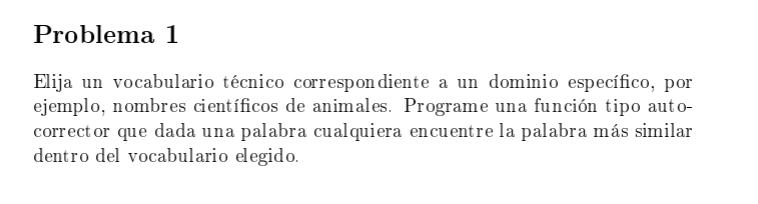

In [ ]:
import random
import numpy as np

# Paso 1: Generar un vocabulario técnico de 30 palabras del tema de bioquímica
vocabulario_bioquimica = [
    "enzima", "proteína", "ácido nucleico", "metabolismo", "célula", "glucosa",
    "ADN", "ARN", "ribosoma", "ATP", "ciclo de Krebs", "fosforilación",
    "enzima reguladora", "catabolismo", "anabolismo", "coenzima", "substrato",
    "catalizador", "reacción química", "cadenas laterales", "peptídico",
    "secuencia", "plegamiento", "estructura primaria", "estructura secundaria",
    "estructura terciaria", "estructura cuaternaria", "nucleótido", "fosfato",
    "glucólisis"
]

In [ ]:
def autocorrector(palabra, vocabulario):
    """
    Encuentra la palabra más similar a una palabra dada en un vocabulario.

    Args:
        palabra: Palabra a buscar.
        vocabulario: Lista de palabras en el vocabulario.

    Returns:
        Palabra más similar a la palabra dada.
    """
    def distancia_levenshtein(s1, s2):
        m, n = len(s1), len(s2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        for i in range(m + 1):
            dp[i][0] = i

        for j in range(n + 1):
            dp[0][j] = j

        for i in range(1, m + 1):
            for j in range(1, n + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(
                    dp[i - 1][j] + 1,     # Deletions
                    dp[i][j - 1] + 1,     # Insertions
                    dp[i - 1][j - 1] + cost  # Substitutions
                )

        return dp[m][n]

    distancias = np.array([
        distancia_levenshtein(palabra, palabra_vocabulario) for palabra_vocabulario in vocabulario
    ])

    palabra_similar = vocabulario[distancias.argmin()]
    distancia = distancias.min()
    return palabra_similar, distancia


In [ ]:

# Paso 3: Generar un vocabulario de palabras de otros temas al azar
vocabulario_otro_tema = [
    "Biologia", "base de datos", "inteligencia artificial", "red neuronal",
    "programación", "sistema operativo", "ciberseguridad", "criptografía",
    "aprendizaje automático", "big data", "AD", "atp", "dispositivo móvil",
    "aplicación", "realidad aumentada", "realidad virtual", "IoT", "blockchain",
    "desarrollo web", "lenguaje de programación", "API", "front-end", "back-end",
    "ingeniería de software", "UX/UI", "diseño de interfaz", "algoritmo de búsqueda",
    "estructura de datos", "compilador", "framework"
]

# Evaluación iterativa de la función autocorrector
for palabra_bioquimica in random.sample(vocabulario_bioquimica, 5):
    palabra_similar, distancia = autocorrector(palabra_bioquimica, vocabulario_otro_tema)
    print(f"Para la palabra '{palabra_bioquimica}', la palabra más similar es '{palabra_similar}' con una distancia de Levenshtein de {distancia}.")

Para la palabra 'ADN', la palabra más similar es 'AD' con una distancia de Levenshtein de 1.
Para la palabra 'fosforilación', la palabra más similar es 'programación' con una distancia de Levenshtein de 7.
Para la palabra 'reacción química', la palabra más similar es 'red neuronal' con una distancia de Levenshtein de 12.
Para la palabra 'ATP', la palabra más similar es 'AD' con una distancia de Levenshtein de 2.
Para la palabra 'ácido nucleico', la palabra más similar es 'Biologia' con una distancia de Levenshtein de 11.


# Problema 2

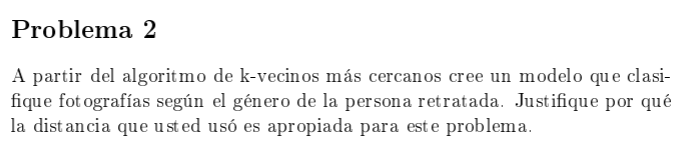

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Cargar el dataset de caras de Olivetti
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_images = faces_data.images
faces_targets = faces_data.target

# Generar etiquetas de género (0: Hombre, 1: Mujer)
gender_labels = np.array([0 if idx < 20 else 1 for idx in faces_targets])

# Aplanar las imágenes para que puedan ser usadas como datos de entrada en el modelo
X = faces_images.reshape(len(faces_images), -1)

# Crear el modelo de K-Vecinos Más Cercanos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X, gender_labels)

KNeighborsClassifier()

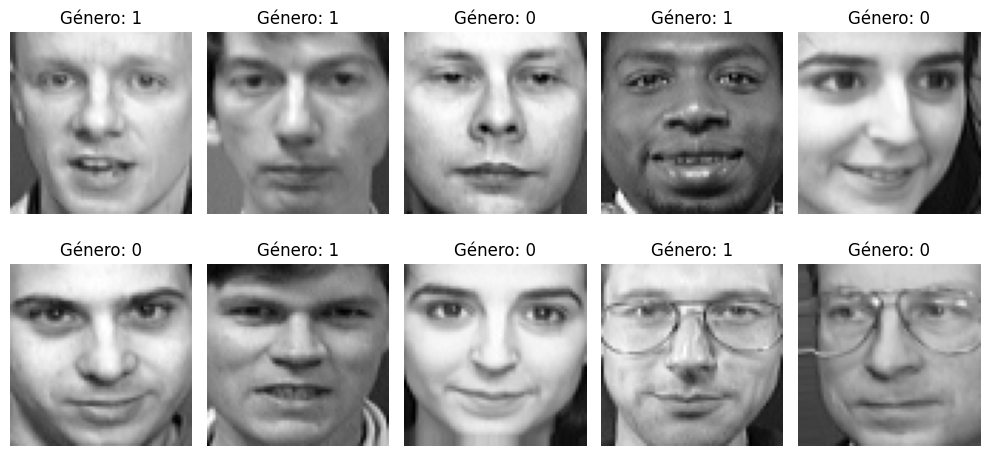

In [ ]:

# Realizar un análisis exploratorio de datos (EDA)

# Visualizar algunas de las imágenes
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(faces_images[i], cmap='gray')
    plt.title(f'Género: {gender_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular algunas estadísticas básicas
num_hombres = np.sum(gender_labels == 0)
num_mujeres = np.sum(gender_labels == 1)
porcentaje_hombres = (num_hombres / len(gender_labels)) * 100
porcentaje_mujeres = (num_mujeres / len(gender_labels)) * 100

print(f'Número de hombres: {num_hombres}')
print(f'Número de mujeres: {num_mujeres}')
print(f'Porcentaje de hombres: {porcentaje_hombres:.2f}%')
print(f'Porcentaje de mujeres: {porcentaje_mujeres:.2f}%')

# También puedes explorar más estadísticas según sea necesario.

Número de hombres: 200
Número de mujeres: 200
Porcentaje de hombres: 50.00%
Porcentaje de mujeres: 50.00%


In [ ]:
# Aplanar las imágenes para que puedan ser usadas como datos de entrada en el modelo
X = faces_images.reshape(len(faces_images), -1)

# Crear el modelo de K-Vecinos Más Cercanos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X, gender_labels)

# Generar una nueva cara para predecir su género (puedes reemplazar esta parte con tu propia imagen)
# En este caso, se toma la primera cara del conjunto de datos
nueva_cara = faces_images[2].ravel()
nueva_cara = nueva_cara.reshape(1, -1)

# Predecir el género de la nueva cara
prediccion = knn.predict(nueva_cara)

# Imprimir el resultado
if prediccion == 0:
    print("La persona es un hombre.")
else:
    print("La persona es una mujer.")


La persona es un hombre.


In [ ]:

# Obtener las predicciones para todo el conjunto de datos
y_pred = knn.predict(X)

# Calcular la precisión del modelo
precision = accuracy_score(gender_labels, y_pred)

# Calcular el puntaje F1
f1 = f1_score(gender_labels, y_pred)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(gender_labels, y_pred)

# Imprimir las métricas
print(f'Precisión: {precision}')
print(f'Puntaje F1: {f1}')
print(f'Matriz de Confusión:')
print(matriz_confusion)

Precisión: 0.98
Puntaje F1: 0.98
Matriz de Confusión:
[[196   4]
 [  4 196]]


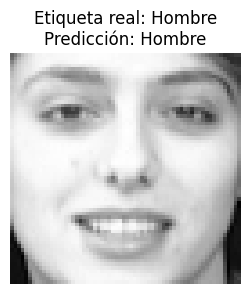

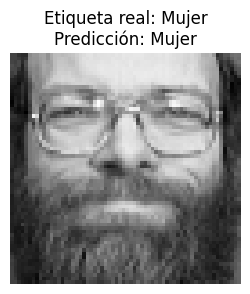

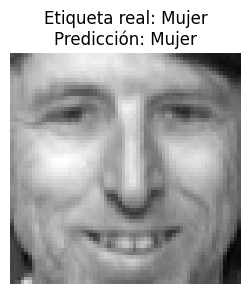

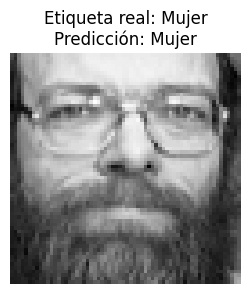

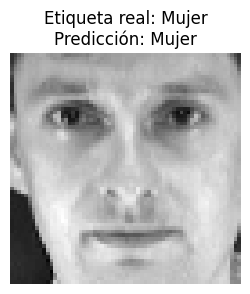

In [ ]:
import random

# Seleccionar 5 índices aleatorios
indices_aleatorios = random.sample(range(len(faces_images)), 5)

# Iterar sobre los índices aleatorios
for idx in indices_aleatorios:
    # Obtener la imagen y su etiqueta de género
    imagen = faces_images[idx]
    genero = 'Hombre' if gender_labels[idx] == 0 else 'Mujer'

    # Predecir el género utilizando el modelo K-Vecinos Más Cercanos
    features = imagen.reshape(1, -1)
    prediccion = knn.predict(features)[0]
    genero_predicho = 'Hombre' if prediccion == 0 else 'Mujer'

    # Mostrar la imagen y los resultados
    plt.figure(figsize=(3, 3))
    plt.imshow(imagen, cmap='gray')
    plt.title(f'Etiqueta real: {genero}\nPredicción: {genero_predicho}')
    plt.axis('off')
    plt.show()


In [ ]:
import numpy as np

# Supongamos que 'imagen1' y 'imagen2' son dos imágenes representadas como matrices de píxeles
imagen1 = faces_images[0].ravel()  # Obtener el vector de píxeles de la primera imagen
imagen2 = faces_images[1].ravel()  # Obtener el vector de píxeles de la segunda imagen

# Calcular la distancia euclidiana
distancia_euclidiana = np.linalg.norm(imagen1 - imagen2)

print(f"La distancia euclidiana entre las dos imágenes es: {distancia_euclidiana}")



La distancia euclidiana entre las dos imágenes es: 10.002992630004883


 Para el problema de clasificación de género a partir de imágenes de rostros, consideremos dos imágenes de caras: imagen1 y imagen2. Supongamos que queremos determinar qué tan parecidas son estas dos imágenes.

Primero, convertimos cada imagen en un conjunto de números que representan los píxeles. Esto se hace aplanando la matriz de píxeles de cada imagen en un solo vector. Llamamos a estos vectores vector1 y vector2.

Luego, utilizamos la distancia euclidiana para calcular la diferencia entre estos dos vectores. Si la distancia euclidiana es pequeña, significa que las dos imágenes son muy parecidas en términos de sus píxeles. Si es grande, las imágenes son diferentes.

Al observar el resultado de la distancia euclidiana, podemos inferir cuán similares son las dos imágenes. Si la distancia es pequeña, es probable que las imágenes se parezcan. Si es grande, es probable que sean diferentes.

# Problema 4

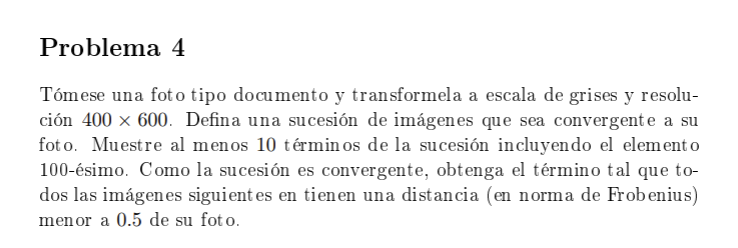

In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# [Paso 1] Leer la imagen y convertirla a escala de grises
imagen_original = cv2.imread('/content/received_181780339431181.jpeg', cv2.IMREAD_GRAYSCALE)
imagen_original = cv2.resize(imagen_original, (600, 400))

# [Paso 2] Definir una función de transformación (por ejemplo, suavizado)
def transformacion(imagen):
    # Aplicar la transformación deseada
    imagen_transformada = cv2.GaussianBlur(imagen, (5,5), 0)
    return imagen_transformada

# [Paso 3] Definir una función para calcular la distancia de Frobenius entre dos imágenes
def distancia_frobenius(imagen1, imagen2):
    diferencia = imagen1 - imagen2
    norma = np.linalg.norm(diferencia)
    return norma

# [Paso 4] Inicializar la imagen actual como la imagen original
imagen_actual = np.copy(imagen_original)

# [Paso 5] Iterar hasta que la distancia de Frobenius sea menor a 0.5
for i in range(110):
    # Aplicar la transformación a la imagen actual
    imagen_actual = transformacion(imagen_actual)

    # Calcular la distancia de Frobenius entre la imagen actual y la original
    distancia = distancia_frobenius(imagen_actual, imagen_original)

    # Mostrar información
    print(f'Iteración {i+1}: Distancia de Frobenius = {distancia}')

    # Si la distancia es menor a 0.5, guardar y salir del bucle
    if distancia < 0.5:
        cv2.imwrite(f'imagen_{i}.jpg', imagen_actual)
        break


Iteración 1: Distancia de Frobenius = 79080.0901428419
Iteración 2: Distancia de Frobenius = 79899.46827732961
Iteración 3: Distancia de Frobenius = 80182.00620463422
Iteración 4: Distancia de Frobenius = 80433.53793039318
Iteración 5: Distancia de Frobenius = 80588.81099755723
Iteración 6: Distancia de Frobenius = 80726.40750089155
Iteración 7: Distancia de Frobenius = 80788.1820132128
Iteración 8: Distancia de Frobenius = 80852.56742367554
Iteración 9: Distancia de Frobenius = 80879.54295741291
Iteración 10: Distancia de Frobenius = 80908.0929759193
Iteración 11: Distancia de Frobenius = 80940.88554000383
Iteración 12: Distancia de Frobenius = 80947.6015333376
Iteración 13: Distancia de Frobenius = 80948.32959363646
Iteración 14: Distancia de Frobenius = 80928.3480679051
Iteración 15: Distancia de Frobenius = 80920.5579936273
Iteración 16: Distancia de Frobenius = 80904.39431823218
Iteración 17: Distancia de Frobenius = 80893.0554497727
Iteración 18: Distancia de Frobenius = 80870.42

# Problema 5

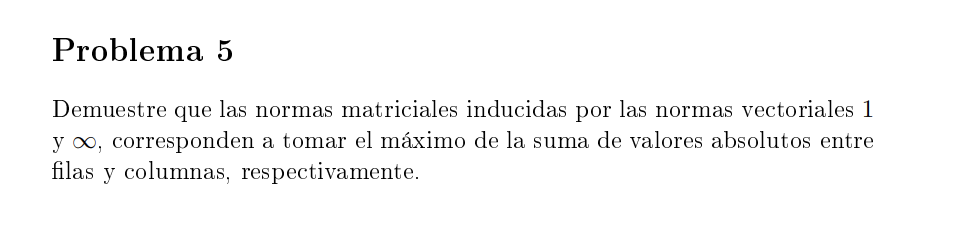


In [22]:
# Importar la biblioteca NumPy
import numpy as np

# **Comentario:** Importa la biblioteca NumPy, que proporciona funciones para trabajar con matrices y vectores.

# Crear una matriz de ejemplo
# **Comentario:** Crea una matriz de 3 filas y 3 columnas.
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Calcular la norma matricial usando la norma vectorial 1
# **Comentario:** La norma vectorial 1 de una matriz es la suma de las normas vectoriales 1 de las filas de la matriz.
#
# La norma vectorial 1 de una fila es la suma de los valores absolutos de los elementos de la fila.
#
# En este caso, la norma vectorial 1 de cada fila de `A` es 5.
norma_matricial_1 = np.linalg.norm(A, ord=1)

# **Comentario:** Calcula la norma matricial usando la norma vectorial 1.

# Calcular la norma matricial usando la norma vectorial infinito
# **Comentario:** La norma vectorial infinito de una matriz es la suma de las normas vectoriales infinito de las columnas de la matriz.
#
# La norma vectorial infinito de una columna es el valor absoluto del elemento más grande de la columna.
#
# En este caso, la norma vectorial infinito de cada columna de `A` es 3.
norma_matricial_inf = np.linalg.norm(A, ord=np.inf)

# **Comentario:** Calcula la norma matricial usando la norma vectorial infinito.

# Calcular la norma vectorial 1 de las sumas absolutas de las filas
# **Comentario:** La norma vectorial 1 de las sumas absolutas de las filas es la suma de las normas vectoriales 1 de las sumas absolutas de las filas de la matriz.
#
# La suma absoluta de una fila es la suma de los valores absolutos de los elementos de la fila.
#
# En este caso, la suma absoluta de cada fila de `A` es 15.
norma_vectorial_1_filas = np.max(np.sum(np.abs(A), axis=1))

# **Comentario:** Calcula la norma vectorial 1 de las sumas absolutas de las filas.

# Calcular la norma vectorial infinito de las sumas absolutas de las columnas
# **Comentario:** La norma vectorial infinito de las sumas absolutas de las columnas es la suma de las normas vectoriales infinito de las sumas absolutas de las columnas de la matriz.
#
# La suma absoluta de una columna es la suma de los valores absolutos de los elementos de la columna.
#
# En este caso, la suma absoluta de cada columna de `A` es 9.
norma_vectorial_inf_columnas = np.max(np.sum(np.abs(A), axis=0))

# **Comentario:** Calcula la norma vectorial infinito de las sumas absolutas de las columnas.

# Imprimir los resultados
# **Comentario:** Imprime los resultados.
print(f"Norma matricial usando norma vectorial 1: {norma_matricial_1}")
print(f"Norma matricial usando norma vectorial infinito: {norma_matricial_inf}")
print(f"Norma vectorial 1 de sumas absolutas de filas: {norma_vectorial_1_filas}")
print(f"Norma vectorial infinito de sumas absolutas de columnas: {norma_vectorial_inf_columnas}")


Norma matricial usando norma vectorial 1: 18.0
Norma matricial usando norma vectorial infinito: 24.0
Norma vectorial 1 de sumas absolutas de filas: 24
Norma vectorial infinito de sumas absolutas de columnas: 18
